In [1]:
import matplotlib.image as mpimg
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pkg_resources
import os
import warnings
warnings.filterwarnings(action='once')

In [2]:
import sys
sys.path.append('../')
import ActflowToolbox as actflow
from nltools.utils import get_resource_path
from nltools.file_reader import onsets_to_dm
from nltools.data import Design_Matrix
import statsmodels.api as sm
from sklearn.preprocessing import scale

/Users/zeynepenkavi/anaconda/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zeynepenkavi/anaconda/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zeynepenkavi/anaconda/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zeynepenkavi/anaconda/envs/py37/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/zeynepenkavi/anaconda/envs/py37/lib/python3.7

# Comparison of intrinsic, task-related, task-unrelated functional connectivity

In [19]:
fig_dir = './output/plots'

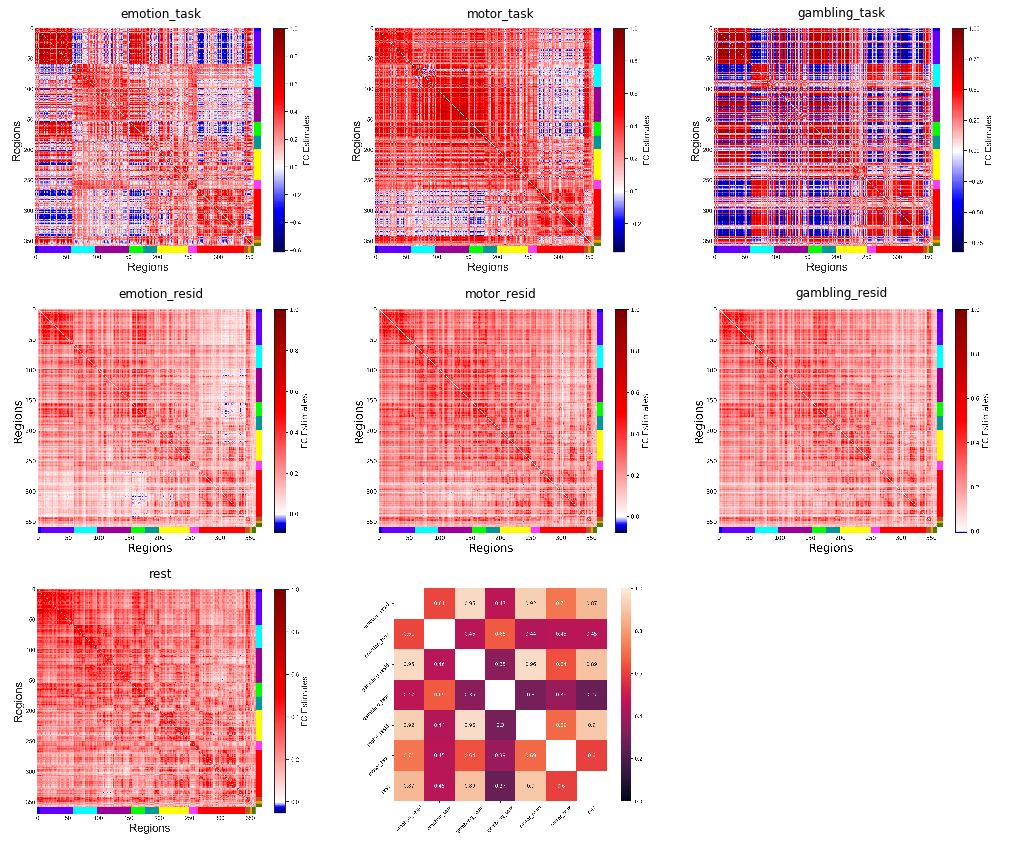

In [24]:
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 15

fig, ax = plt.subplots(3, 3)
ax = ax.flatten()
axs = ax[:7]

task_names = ['emotion_task', 'motor_task', 'gambling_task','emotion_resid', 'motor_resid', 'gambling_resid', "rest"]

for a, task_name in zip(axs, task_names):
    tmp = mpimg.imread(os.path.join(fig_dir, '%s_fc.png'%(task_name)))
    a.set_title(task_name)
    a.axis('off')
    a.imshow(tmp)

ax[7].axis('off')
tmp = mpimg.imread(os.path.join(fig_dir, 'fc_cor.png'))
ax[7].imshow(tmp)
ax[8].axis('off')

plt.subplots_adjust(wspace=.05, hspace=.1)

#plt.savefig(os.path.join(fig_dir, "fc_comp.png"), dpi = 250, bbox_inches='tight')

The goal of our project was to extend our understanding of what the brain does when instructed to complete a task.  

To this end we decomposed task activity into task related versus task unrelated components. Task activity was modeled in the traditional univariate GLM framework as a function of experimenter controlled conditions (blocks) and nuisance regressors related to signal drift (intercept, linear and quadratic trends).  

Task-related activity was operationalized as the predicted timeseries generated by multiplying the task condition coefficients with the (convolved) task timing.  

Task-unrelated activity was operationalized as the residual timeseries from the GLMs.

After extracting the task-related and task-unrelated activity for each of the 360 Glasser Parcels we calculated the functional connectivity matrices capturing the coactivations of both types of activity between each parcel.

Additionally we computed the resting state functional connectivity as the ltierature suggests large degress of overlaps between task state and resting state functional connectivity.  

Comparing the similarity betwen the resting state functional connectivity with the task unrelated and task related activity functional connectivity we found that all task unrelated FCs were most similar to each other and to the resting state FC.  

Task related FC related differently to both other task related FCs, as well as resting state FC and task unrelated FC depending on the task.  

This suggests similarity between task state and resting state FCs that is documented in the literature is driven primarily by task unrelated activity. Task related connectivity is, as intended, both different than resting state connectivty and varies by task demands.  

# Task unrelated activity independent of rest

Is there information that encodes the brain is in a "task state" in the task (timing) unrelated activity or is it all driven by intrinsic connectivity as measured by resting state?

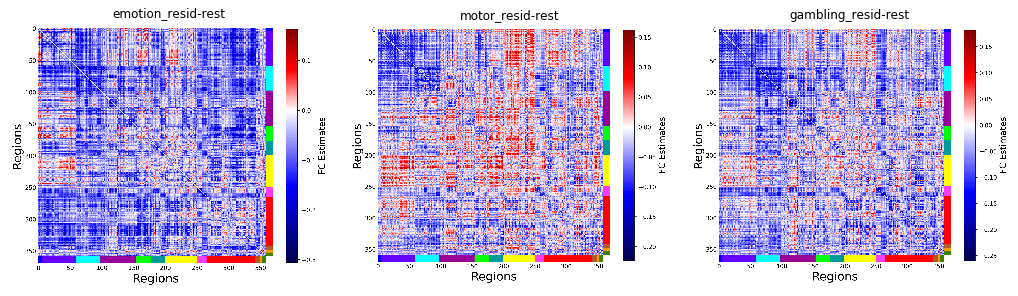

In [28]:
plt.rcParams["figure.figsize"][0] = 18
plt.rcParams["figure.figsize"][1] = 5

fig, ax = plt.subplots(1, 3)
ax = ax.flatten()

task_names = ['emotion_resid-rest', 'motor_resid-rest', 'gambling_resid-rest']

for a, task_name in zip(ax, task_names):
    tmp = mpimg.imread(os.path.join(fig_dir, '%s_fc.png'%(task_name)))
    a.set_title(task_name)
    a.axis('off')
    a.imshow(tmp)

plt.subplots_adjust(wspace=.05, hspace=.1)

plt.savefig(os.path.join(fig_dir, "resid-rest.png"), dpi = 250, bbox_inches='tight')